# **Recommender Systems**
- They are systems of machine learning algorithms that suggest relevant items to users based on patterns in the data
- They are used extensively in companies like Netflix, Amazon, YouTube, Spotify, etc...
- **Rating**: is Important and represents the preference score that a user would give to an item, which helps generate personalized recommendations
- **Collaborative Filtering**:
    - **User-Based**: recommends items based on preferences of similar users
    - **Item-Based**: recommends items similar to the ones a user already likes 4
- Mathematical concept of Collaborative Filtering:
    - The system quantifies the similarity between user preferences using **Cosine Similarity**
    - The Rating are Vectors in Multi-dimensional space - and it grabs user as a vector and then it tries to calculate how similar are we to other users/vectors
$$ Similarity = cos(\theta) = (A . B) / (||A||*||B||) $$

> we can get theta from this 

![cos](https://kdb.ai/files/2024/01/similarity-768x348.png)

The output is a range between -1, 0, 1:
    - 1 -> Vectors are in the same direction (Maximum Similarity)
    - 0 -> Vectors are in the orthogonal direction (NO Similarity / Unrelated )
    - -1 -> Vectors are in the opposite direction (Completely Dissimilar)

![user](https://www.oreilly.com/api/v2/epubs/9781789807943/files/assets/d22941f0-29d2-4c0e-8a79-5f065e5f527e.png)

Person 1 likes all the fruits 
Person 3 likes some of the fruits that Person 1 likes, so the recommender system suggest Person 3 the rest of the fruits that Person 1 liked guessing that maybe the Person 3 would also like the rest of the fruits that Person 1 liked

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

#cos similarity 
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv('/home/vinayakgaur07/Downloads/rating.csv')
df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
df['user_id'].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516], shape=(73515,))

In [5]:
df['rating'].unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

<Axes: xlabel='rating', ylabel='count'>

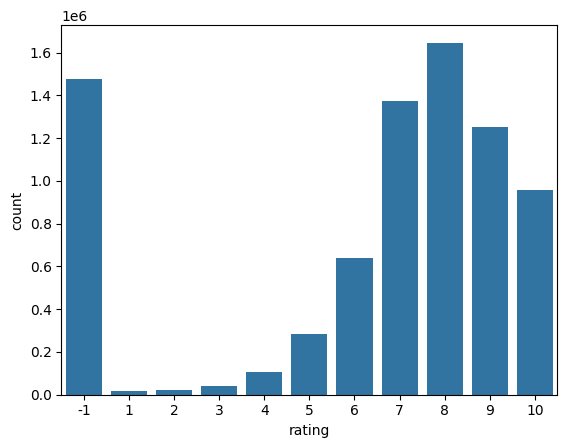

In [6]:
sns.countplot(data=df, x='rating')

> -1 is the number of users that didnt rated, so we can remove it 

In [8]:
#to remove all the '-1' ratings from rating
df = df[df['rating'] != -1]
df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


<Axes: xlabel='rating', ylabel='count'>

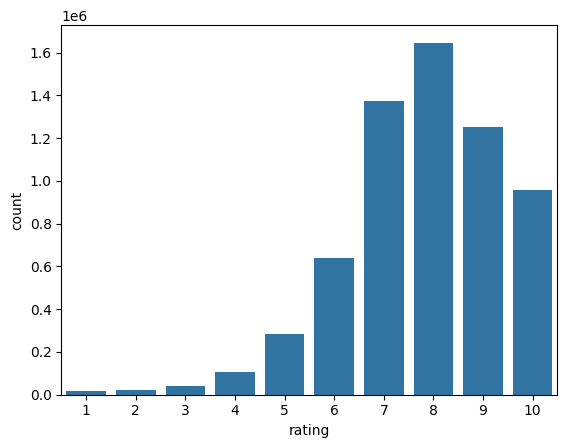

In [9]:
sns.countplot(data=df, x='rating')


In [10]:
df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

> so there is one duplicate, now to locate it:

In [13]:
df[df.duplicated()]

,user_id,anime_id,rating
4499316,42653,16498,8


>drop it 

In [15]:
df.drop_duplicates(inplace=True)

Ratings given by each user:

In [17]:
ratings_per_user = df.groupby('user_id')[['rating']].count()
ratings_per_user

,rating
user_id,
1,4
2,1
3,92
5,459
7,343
...,...
73512,12
73513,33
73514,1


In [18]:
ratings_per_user.mean()

rating    91.052299
dtype: float64

In [24]:
ratings_per_anime = df.groupby('anime_id')[['rating']].count()

ratings_per_anime

,rating
anime_id,
1,13449
5,5790
6,9385
7,2169
8,308
...,...
34324,11
34325,15
34349,3


Get top 10 users with the most ratings:

In [25]:
ratings_per_user.nlargest(10, 'rating')

,rating
user_id,
42635,3747
53698,2905
57620,2689
59643,2632
51693,2621
45659,2462
7345,2429
12431,2348
65840,2215


Get top 10 users with the least ratings:

In [26]:
ratings_per_user.nsmallest(10, 'rating')

,rating
user_id,
2,1
9,1
15,1
35,1
59,1
70,1
86,1
113,1
114,1


Filter to include only anime with 1000 or more ratings:

In [30]:
filtered_ratings_per_anime = ratings_per_anime[ratings_per_anime['rating'] >= 1000]

filtered_ratings_per_anime.shape

(1462, 1)

will be used later - extract the indices of the popular anime:

In [31]:
popular_anime = filtered_ratings_per_anime.index.tolist()
popular_anime[:10]

[1, 5, 6, 7, 15, 16, 18, 19, 20, 22]

filter the dataframe to include only users with 500 ratings and above(super users):

In [32]:
filtered_ratings_per_user_df = ratings_per_user[ratings_per_user['rating'] >= 500]

In [33]:
super_users = filtered_ratings_per_user_df.index.tolist()
super_users[:10]

[226, 271, 294, 392, 446, 478, 661, 741, 771, 786]

In [34]:
#filter ratings to include only ratings for popular anime 
filtered_ratings = df[df['anime_id'].isin(popular_anime)]

filtered_ratings.shape

(5192793, 3)

In [35]:
#further filter the ratings to only include ratings from super users
filtered_ratings = df[df['user_id'].isin(super_users)]

filtered_ratings.shape

(1005314, 3)

## User-Item Rating Pivot

In [37]:
#create a pivot table to construct user-item rating
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')
rating_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,9.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73362,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73378,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73395,10.0,9.0,10.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>NaN represents that the user didnt either rated the anime or either they never watched it - but as we know ml models cannot handle missing values so we are required to fill them using a filler value 

In [38]:
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating', fill_value=0)
rating_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73362,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73378,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73395,10.0,9.0,10.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we 
#### Compute Cosine Similarity:

In [40]:
user_similarity = cosine_similarity(rating_matrix)
user_similarity

array([[1.        , 0.31052381, 0.36980954, ..., 0.36236069, 0.33636818,
        0.30650698],
       [0.31052381, 1.        , 0.268366  , ..., 0.290322  , 0.2870974 ,
        0.22791986],
       [0.36980954, 0.268366  , 1.        , ..., 0.3498557 , 0.41170536,
        0.37794637],
       ...,
       [0.36236069, 0.290322  , 0.3498557 , ..., 1.        , 0.34721124,
        0.31961904],
       [0.33636818, 0.2870974 , 0.41170536, ..., 0.34721124, 1.        ,
        0.42175493],
       [0.30650698, 0.22791986, 0.37794637, ..., 0.31961904, 0.42175493,
        1.        ]], shape=(1365, 1365))

All the sklearn models return a Numpy Array, and we need to convert this back to a DataFrame :

In [42]:
#convert the output into a dataframe for easier interpretation 
user_similarity_df = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)
user_similarity_df

user_id,226,271,294,392,446,478,661,741,771,786,...,73234,73272,73286,73340,73356,73362,73378,73395,73499,73502
user_id,,,,,,,,,,,,,,,,,,,,,
226,1.000000,0.310524,0.369810,0.368844,0.479172,0.351496,0.339471,0.453386,0.397297,0.384594,...,0.290858,0.362299,0.413587,0.434253,0.309391,0.288167,0.453607,0.362361,0.336368,0.306507
271,0.310524,1.000000,0.268366,0.221096,0.342823,0.376454,0.306231,0.345585,0.357868,0.493646,...,0.272166,0.159041,0.307801,0.289110,0.096752,0.346684,0.357435,0.290322,0.287097,0.227920
294,0.369810,0.268366,1.000000,0.358606,0.387980,0.394491,0.360027,0.419455,0.361109,0.470477,...,0.361611,0.282967,0.362801,0.413025,0.353574,0.340823,0.451359,0.349856,0.411705,0.377946
392,0.368844,0.221096,0.358606,1.000000,0.397043,0.307310,0.293243,0.316196,0.396577,0.314374,...,0.286049,0.340013,0.342345,0.465727,0.322202,0.266032,0.434801,0.360945,0.304120,0.242900
446,0.479172,0.342823,0.387980,0.397043,1.000000,0.377938,0.405816,0.430414,0.404201,0.430761,...,0.357724,0.353429,0.402775,0.431481,0.314192,0.292046,0.481478,0.401871,0.340195,0.335937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73362,0.288167,0.346684,0.340823,0.266032,0.292046,0.450861,0.272566,0.358541,0.437512,0.412681,...,0.334768,0.207235,0.350239,0.349987,0.238223,1.000000,0.396227,0.318946,0.332661,0.355931
73378,0.453607,0.357435,0.451359,0.434801,0.481478,0.465542,0.359494,0.462871,0.504422,0.487243,...,0.431488,0.297537,0.450135,0.470631,0.343550,0.396227,1.000000,0.439854,0.456134,0.454755
73395,0.362361,0.290322,0.349856,0.360945,0.401871,0.404292,0.332429,0.377932,0.367900,0.397738,...,0.366442,0.264322,0.403430,0.380225,0.244898,0.318946,0.439854,1.000000,0.347211,0.319619


now these are users as columns and rows and we can actually, match one user to other to see if their ratings match/similar